In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### function-drawing the line

In [2]:
def draw_line(x, y):
    line = plt.plot(x, y)

#### function-sigmoid

In [3]:
def sigmoid(input):
    return 1 / (1 + np.exp(-input) )

## Function-calculating the error

In [4]:
def calculate_error(line_parameters, points, label):
    m = points.shape[0] # // returns a tuple of our arrays dimension
    linear_combination = points * line_parameters
    p = sigmoid(linear_combination)
    # // the CE-error equation, y = label
    cross_entropy = -1 * (np.log(p).T * label + np.log(1 - p).T * (1 - label))
    # print("cross_entropy", cross_entropy.shape)
    ce_error = cross_entropy / m
    print("ce_error = ", ce_error)
    print("the cross entropy error is: ", ce_error[0][0] * 100, "%")
    return ce_error

#### Initial steps - making and plotting the points

In [5]:
number_of_points = 50

np.random.seed(3)

## bias
bias_every_point = np.ones(number_of_points)

random_x1_values = np.random.normal(10, 2, number_of_points)  # // points according to the horizontal axis
random_x2_values = np.random.normal(12, 2, number_of_points)  # // points according to the vertical axis
top_region_points = np.array([random_x1_values, random_x2_values, bias_every_point]).T

## bottom region
random_x1_values_2 = np.random.normal(5, 2, number_of_points)
random_x2_values_2 = np.random.normal(6, 2, number_of_points)
bottom_region_points = np.array([random_x1_values_2, random_x2_values_2, bias_every_point]).T

## all points
all_points = np.vstack((top_region_points, bottom_region_points))

## Line
w1 = -0.2
w2 = -0.35
b = 3.5  # // bias value
line_parameters = np.matrix([w1, w2, b]).T # // took the transpose ,so we can multiply it by all_points
x1 = np.array([bottom_region_points[:, 0].min() - 2, top_region_points[:, 0].max() + 2] )
# // here I took the min from the horizontal points of the bottom region,
# // and the max from the horizontal points of the top region

x2 = -b/w2 - (w1 * x1)/w2

## Label
y = np.array([np.zeros(number_of_points), np.ones(number_of_points)]).reshape(number_of_points * 2, 1)
# // we basically make the first 50 points zeros and the second 50 points ones
# print(y)

#### Display the points

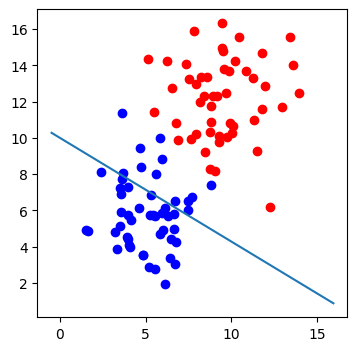

In [6]:

_, axis = plt.subplots(figsize=(4, 4) )

axis.scatter(top_region_points[:, 0], top_region_points[:, 1], color='r')
axis.scatter(bottom_region_points[:, 0], bottom_region_points[:, 1], color='b')
draw_line(x1, x2)
plt.show()

## Error

In [7]:
calculate_error(line_parameters, all_points, y)

ce_error =  [[0.32324719]]
the cross entropy error is:  [[32.32471868]] %


matrix([[0.32324719]])